<a href="https://colab.research.google.com/github/JhonHander/AI-Predict-Concrete-Compressive-Strength/blob/main/mlp_strength_concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [ ]:
df = pd.read_csv('/content/concrete_data.csv')

# EDA

In [ ]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.isnull().values.any()

False

<Axes: >

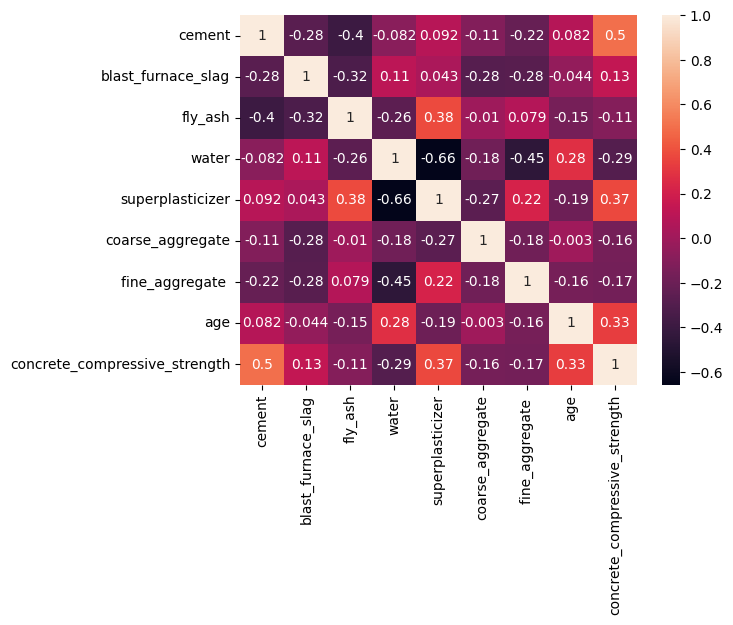

In [ ]:
sns.heatmap(df.corr(), annot=True)

**concrete_compressive_strength** que es la viariable objetivo tiene una breve correlacion con **cement**, **superplasticizer** y **age** y una correlación inversa relativamente pequeña con **water**. Veamos como funcionan estas variables en el dataset

In [ ]:
print('Minimum age: ', df['cement'].min())
print('Maximum age: ',df['cement'].max())
print('Mean value: ', df['cement'].mean())
print('Median value: ',df['cement'].median())
print('Standard deviation: ', df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.16786407766995
Median value:  272.9
Standard deviation:  104.50636449481543


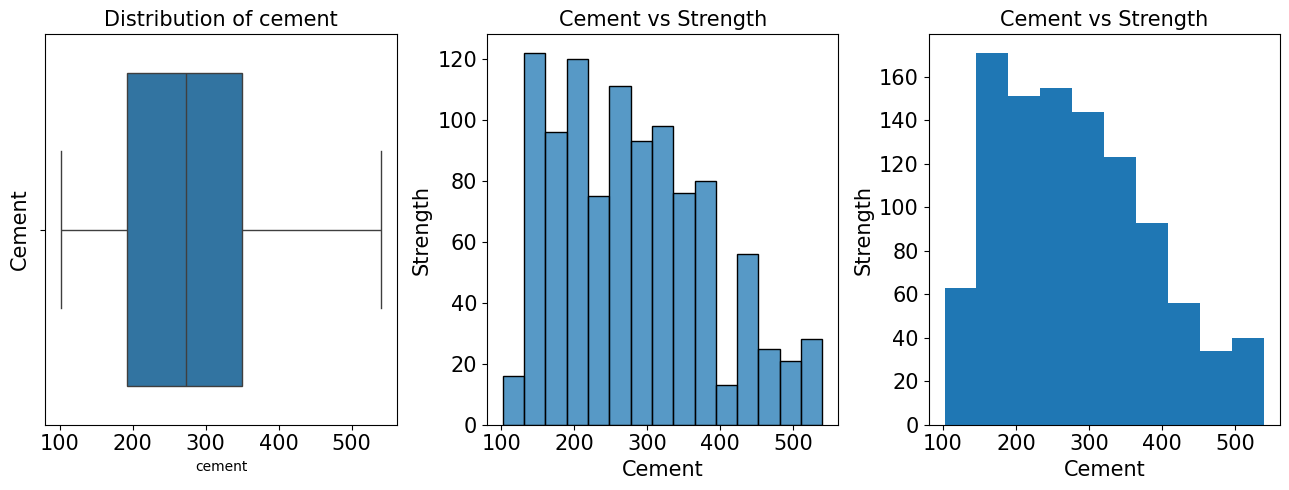

In [ ]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=df,ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#histplot
sns.histplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
print('Minimum superplastic: ', df['superplasticizer'].min())
print('Maximum superplastic: ',df['superplasticizer'].max())
print('Mean value: ', df['superplasticizer'].mean())
print('Median value: ',df['superplasticizer'].median())
print('Standard deviation: ', df['superplasticizer'].std())
print('Null values: ',df['superplasticizer'].isnull().any())

Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174758
Median value:  6.4
Standard deviation:  5.973841392485506
Null values:  False


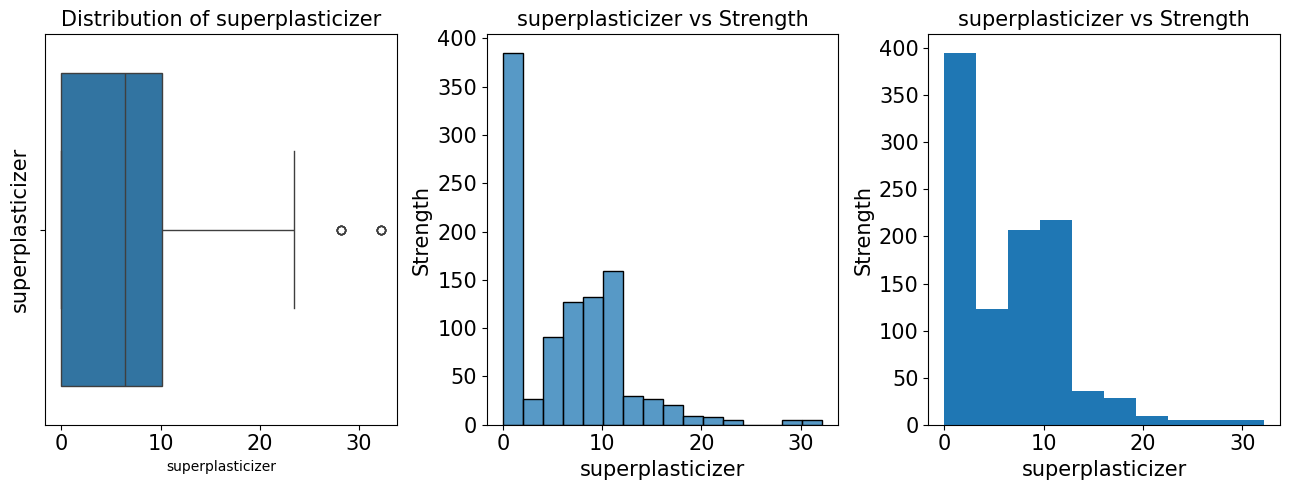

In [ ]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplasticizer',data=df,ax=ax1)
ax1.set_ylabel('superplasticizer', fontsize=15)
ax1.set_title('Distribution of superplasticizer', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.histplot(df['superplasticizer'],ax=ax2)
ax2.set_xlabel('superplasticizer', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('superplasticizer vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['superplasticizer'])
ax3.set_xlabel('superplasticizer', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('superplasticizer vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
print('Minimum age: ', df['age'].min())
print('Maximum age: ',df['age'].max())
print('Mean value: ', df['age'].mean())
print('Median value: ',df['age'].median())
print('Standard deviation: ', df['age'].std())
print('Null values: ',df['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.169911581033155
Null values:  False


In [ ]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', Q3-Q1)

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0
Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [ ]:
print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', df[df['age']<-66.5]['age'].count())

Number of outliers in age upper :  59
Number of outliers in age lower :  0


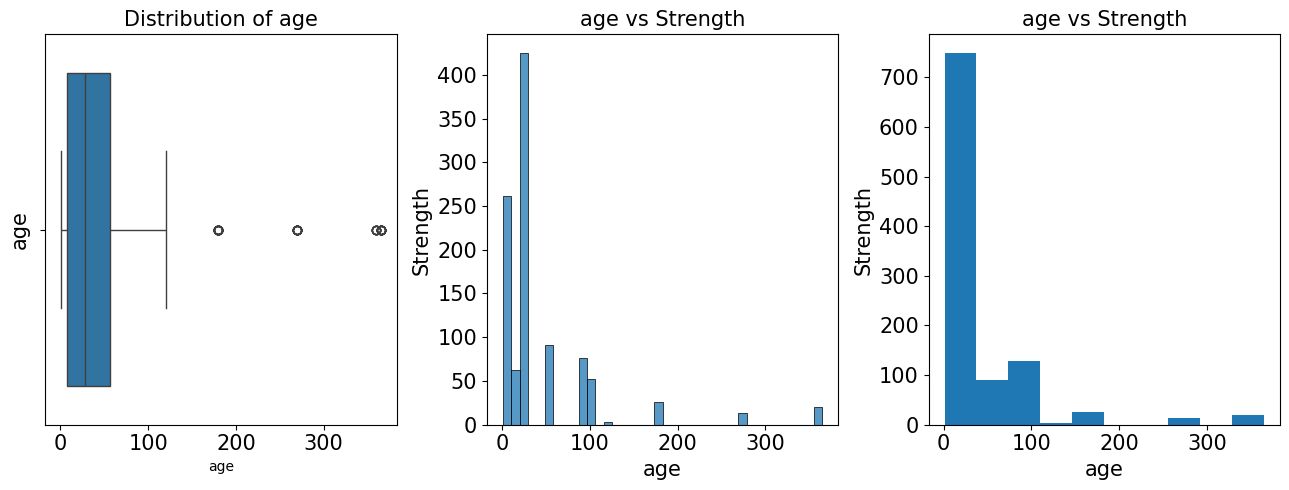

In [ ]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,ax=ax1)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.histplot(df['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

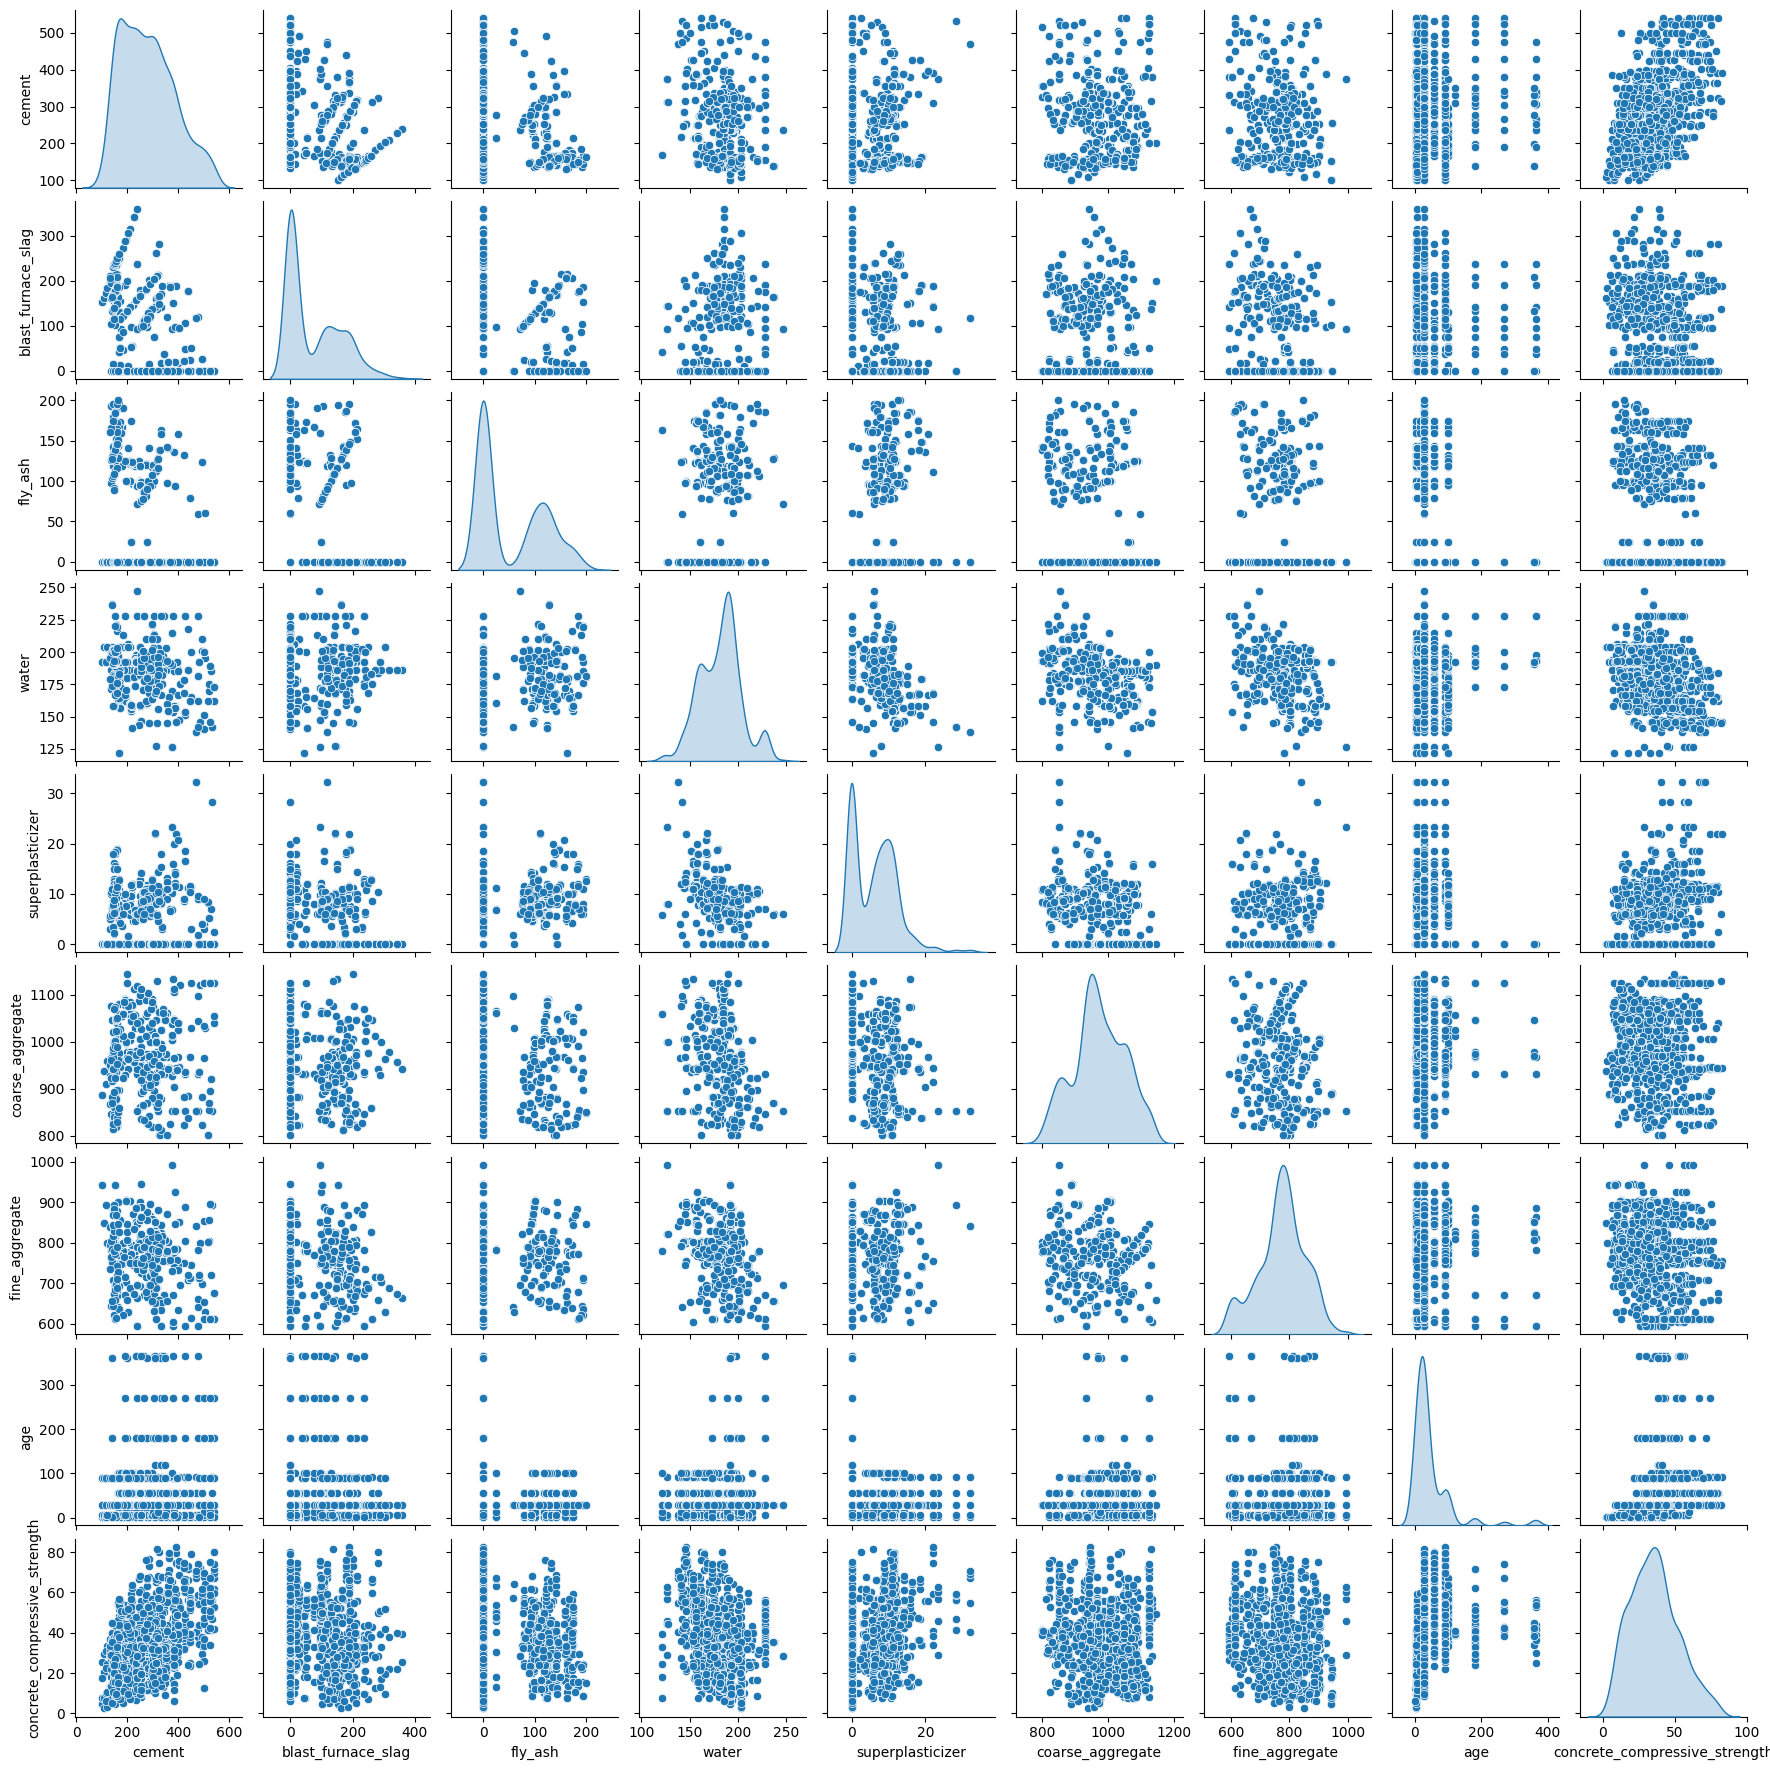

In [ ]:
sns.pairplot(df, diag_kind='kde', height=2)

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'blast_furnace_slag'}>,
        <Axes: title={'center': 'fly_ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplasticizer'}>,
        <Axes: title={'center': 'coarse_aggregate'}>],
       [<Axes: title={'center': 'fine_aggregate '}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'concrete_compressive_strength'}>]],
      dtype=object)

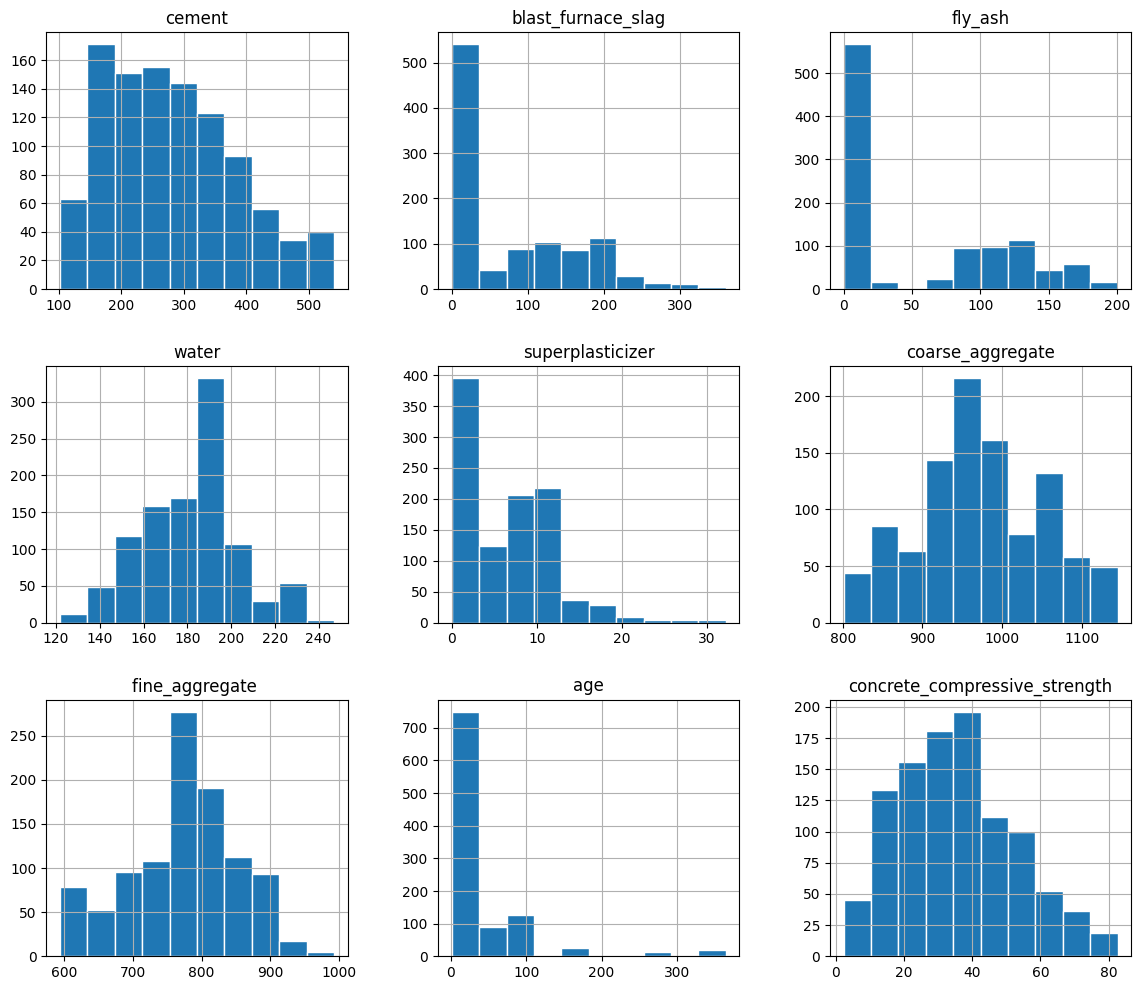

In [ ]:
df.hist(figsize=(14,12), edgecolor='white')

# Modelo


In [ ]:
# Usar el 28% para testing y 72% para training
X = df.drop('concrete_compressive_strength', axis=1)
y = df['concrete_compressive_strength']

# train y test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# validacion
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

tf.random.set_seed(42)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 734.8775 - mse: 734.8775 - val_loss: 751.6383 - val_mse: 751.6383 - learning_rate: 0.0100
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 323.0105 - mse: 323.0105 - val_loss: 635.2780 - val_mse: 635.2780 - learning_rate: 0.0100
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 277.3905 - mse: 277.3905 - val_loss: 609.0225 - val_mse: 609.0225 - learning_rate: 0.0100
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 249.8617 - mse: 249.8617 - val_loss: 566.6608 - val_mse: 566.6608 - learning_rate: 0.0100
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 216.9321 - mse: 216.9321 - val_loss: 441.3070 - val_mse: 441.3070 - learning_rate: 0.0100
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 174.3494 - mse: 174.3494 - val_loss: 345.7825 - val_mse: 345.7825 - learning_rate: 0.0100
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 142.0023 - mse: 142.0023 - val_loss:

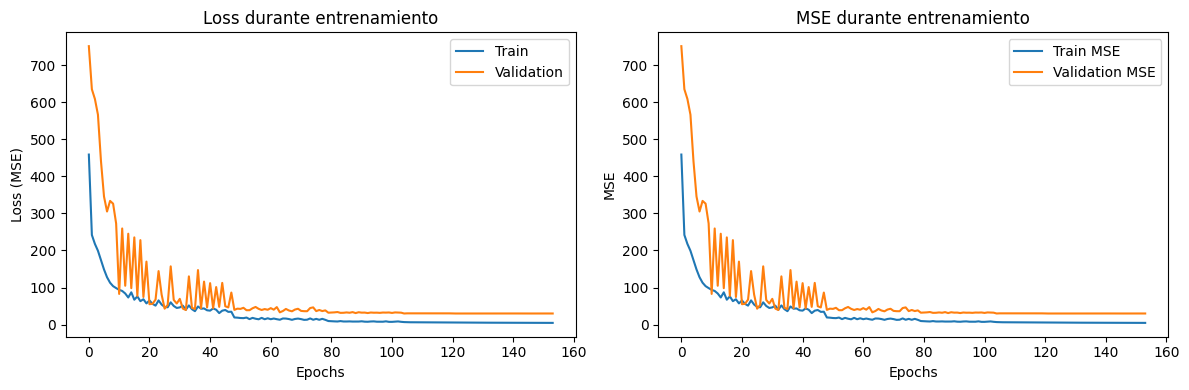

In [ ]:
norm_layer = Normalization()
X_train_np = X_train.to_numpy()
norm_layer.adapt(X_train_np)

model = Sequential([
    norm_layer,
    Dense(200, activation='relu'),
    Dense(130, activation='relu'),
    Dense(80, activation='relu'),
    Dense(1)
])

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

#para parar el modelo cuando no mejore
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

#para reducir el learning rate si no mejora validation_loss
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

X_valid_np = X_valid.to_numpy()
history = model.fit(
    X_train_np,
    y_train,
    epochs=1000,
    validation_data=(X_valid_np, y_valid),
    callbacks=[early_stopping, reduce_lr],
)

X_test_np = X_test.to_numpy()
mse_test = model.evaluate(X_test_np, y_test, verbose=0)[0]
print("MSE en test set:", mse_test)

X_new = X_test_np[:3]
y_pred = model.predict(X_new)
print("Predicciones:", y_pred.flatten())
print("Valores reales:", y_test[:3].values)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss durante entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE durante entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()